In [40]:
import numpy as np

import matplotlib.pyplot as plt
from funcs import plot_settings
plot_settings()

plt.rcParams["figure.figsize"] = (15, 8)

In [86]:
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [133]:
x = np.random.random((1000,))*10

real_params = np.array([2, 3])

pv = 0.9

In [134]:
noise = [(1 + np.random.random())*10 if np.random.random() < pv else 0. for _ in range(x.shape[0])]

In [135]:
y = real_params[0]*x + real_params[1] + np.random.normal(0, 1, x.shape) + noise[::-1]

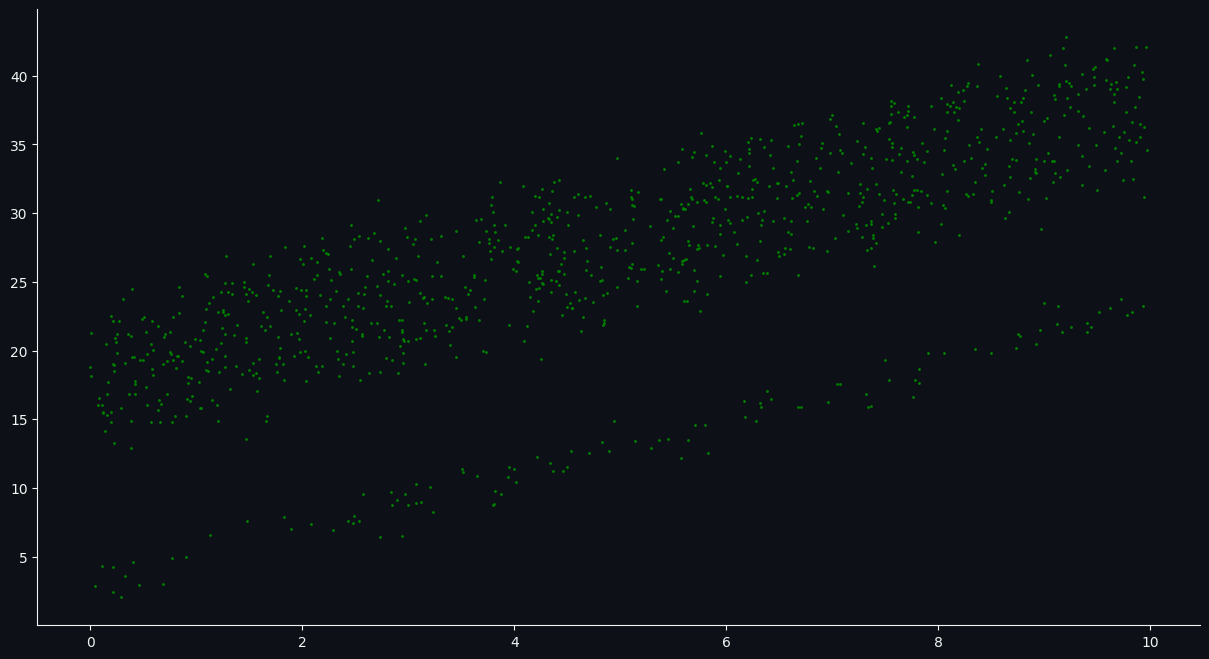

In [136]:
plt.scatter(x, y, 1)

In [137]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [138]:
x = [[x[i]] for i in range(len(x))]

In [139]:
regressor = RANSACRegressor().fit(x, y)

In [140]:
y_predicted = regressor.predict(x)

In [141]:
print(f"Средняя квадратичная ошибка для RANSAC: {mean_squared_error(y, y_predicted)}")

Средняя квадратичная ошибка для RANSAC: 34.901231136799076


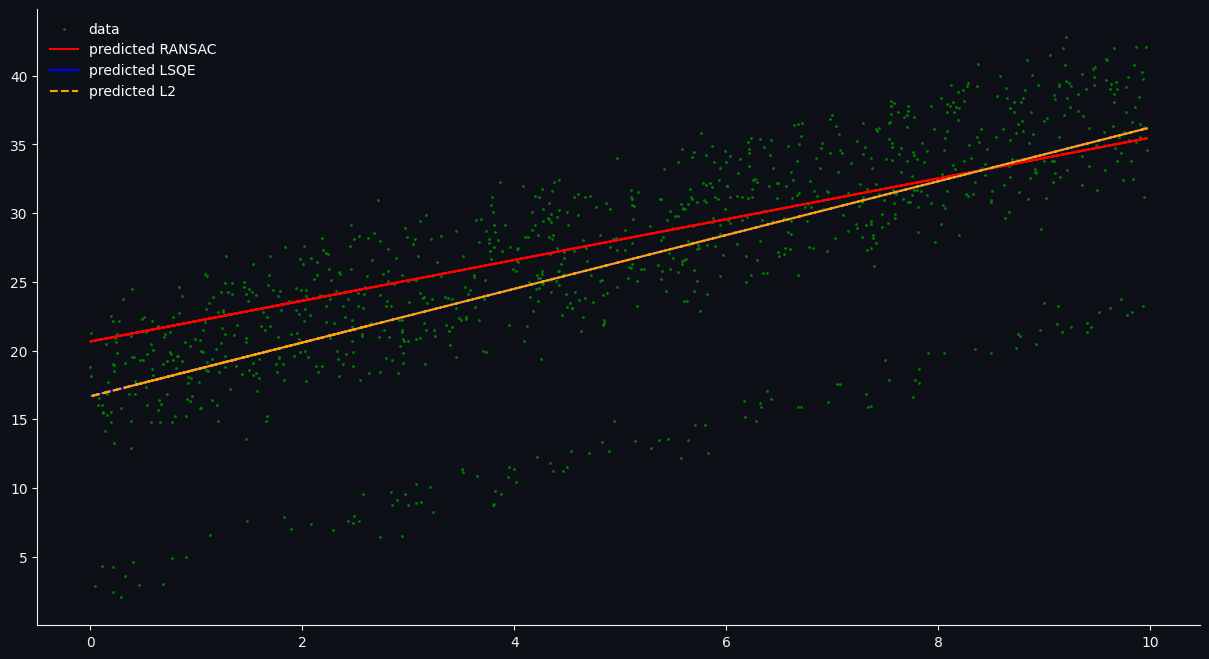

In [142]:
plt.scatter(x, y, 1, label='data')
plt.plot(x, y_predicted, label='predicted RANSAC', c='r')
plt.plot(x, LinearRegression().fit(x,y).predict(x), label='predicted LSQE', c='b')
plt.plot(x, Ridge(alpha=1).fit(x,y).predict(x), '--', label='predicted L2', c='orange')
plt.legend()